#  <b>🤖 Wikipedia Web Crawler</b>

###  <b> ✺ first, Create a folder 'data' in the same directory of the ipynb file, then run</b>

In [1]:
import os
import time
import requests
from bs4 import BeautifulSoup
import re
from collections import deque
from urllib.parse import urlparse
import numpy as np
import time
import matplotlib.pyplot as plt

# define the name of the directory to be created
path = "C:/Users/User/Desktop/web_intelligence_project"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory C:/Users/User/Desktop/web_intelligence_project failed


## ➳ Search Settings

In [2]:
# BFS Queue
queue = deque([])

# Temporary results for files writing
result_urls = []
result_urls_ref = []
# Search Settings
max_depth = 2
max_search = 20

# <u>Breadth-First Serch Crawling<u>

## ➳ [Wikipedia: robots.txt](https://en.wikipedia.org/robots.txt)

## ➳ write URL into txt file

In [3]:
crawl_time = []
def BFS_crawler(seed_url):
    start = time.time()
    # Initialize the depth of the search
    depth = 1
    # Initialize Queue Setting for Breadth-First Search 
    queue.append(seed_url)
    
    while (len(queue)) != 0 and len(result_urls) < max_search and depth < max_depth:
        # for elements in the Queue
        size = len(queue)
        for i in range (0,size):
            
            # BFS: 1) remove/pop the 1st from the Queue 
            current_url = queue.popleft()            
            # Try to avoid limited server capacity ( Frequency of scraping )
            time.sleep(3)
            # Getting Source Code by requests package
            source_code = requests.get(current_url).text
            # Parse HTML by BeautifulSoup package
            soup = BeautifulSoup(source_code, "html.parser")
            # Get Wiki content from div element of the HTML page 
            content = soup.find('div', {'id': 'mw-content-text'})
            #title = soup.find('h1', {'id': 'firstHeading'} and {'class': 'firstHeading'})
            
            ######################
            # GET RELATED CONTENT!
            ######################
            
            for item in content.findAll('a',{'class':'external text'}):
                url = item.get('href')             
                if url not in result_urls_ref:
                    result_urls_ref.append(url)
                    print(url)
                keywords = ['Ebay']
                for keyword in keywords:
                        if keyword in url:
                            result_urls_ref.append(url)
                            print(url)
                            
            # Respecting robots.txt that indicates which parts of the website you should not scrap
            for item in content.findAll('a', {'title': True} and {'class': False}):
                if ('#' not in item.get('href')) and item.get('href').startswith('/wiki/') \
                and not item.get('href').startswith('/wiki/Category:') \
                and not item.get('href').startswith('/wiki/File:') \
                and not item.get('href').startswith('/wiki/Template:') \
                and not item.get('href').startswith('/wiki/Book:') \
                and not item.get('href').startswith('/wiki/Portal:') \
                and not item.get('href').startswith('/wiki/Help:') \
                and not item.get('href').startswith('/wiki/Template_talk:') \
                and not item.get("href").startswith('/wiki/Special:') \
                and not item.get("href").startswith('/wiki/Wikipedia:WikiProject_Philosophy/') \
                and not item.get('href').startswith('/wiki/Talk:'):
                    
                    """
                    After respecting the will of the website owner and 
                    adapt to the information contained therein
                    """
                   
                    # get full url of wikipedia 
                    url = "https://en.wikipedia.org" + item.get('href')

                    
                    # Relation to specific hashtag - fill in keyword if you want or leave null
                    #keywords = ['e-commerce','mobile commerce','e-shop','online shopping','internet marketing','industry','retail','ebay']
                    
                    #for keyword in keywords:
                        # BFS: 2) Create new paths to all children
                    #    if re.search(keyword, url, re.IGNORECASE) :

                            # check if there's still elements in the Queue and the URL is unique
                            # ( BFS: 3) Reject the new paths with loops )
                    if len(result_urls) < max_search and url not in result_urls:

                        # add the URL to to results (in order to write after to a file)  
                        result_urls.append(url)

                        # BFS: 4) add the url to the end of the Queue
                        queue.append(url)
                        print("For Depth ",depth,'  --->\n#' , len(result_urls) , url)

                    # if goal is acheived ---> stop 
                    if len(result_urls) == max_search:
                        return 0
                    
                    keyword=""        
                    if len(result_urls) != max_search: 
                        # BFS: 2) Create new paths to all children
                        if re.search(keyword, url, re.IGNORECASE) :

                            # check if there's still elements in the Queue and the URL is unique
                            # ( BFS: 3) Reject the new paths with loops )
                            if len(result_urls) < max_search and url not in result_urls:

                                # add the URL to to results (in order to write after to a file)  
                                result_urls.append(url)

                                # BFS: 4) add the url to the end of the Queue
                                queue.append(url)
                                print("For Depth ",depth,'  --->\n#' , len(result_urls) , url)

                            # if goal is acheived ---> stop 
                            if len(result_urls) == max_search:
                                return 0
                        
        # Increase the depth search by 1

        depth += 1
    finish = time.time()
    crawl_time.append(finish-start)   

In [4]:
def output_urls(urls,name):
    file_loc = 'C:/Users/User/Desktop/web_intelligence_project/data/'+str(name)+'.txt'
    fx = open(file_loc, "w+")
    for url in urls:
        fx.write(url + '\n')
    fx.close()
    #print("Done - Check the new files in the folder ^data^")

## ➳ Crawl First URL

In [5]:
def output_urls_ref(urls,name):
    file_loc = 'C:/Users/User/Desktop/web_intelligence_project/data/ref/'+str(name)+'.txt'
    fx = open(file_loc, "w+")
    for url in urls:
        fx.write(url + '\n')
    fx.close()

In [6]:
def crawl_first_url(seed_url):    
    #seed_url = input("Please enter wikipedia URL to crawl")
    parse_url = urlparse(seed_url)
    name_tmp = parse_url.path[6:]
    #print(name_tmp)
    BFS_crawler(seed_url)
    output_urls(result_urls,name_tmp)
    output_urls_ref(result_urls_ref,name_tmp)
    return name_tmp

## ➳ Crawl Related URL's

In [7]:
def crawl_related(filepath):
    #filepath = 'data/'+str(name)+'.txt'
    with open(filepath) as fp:
        lines = [line.rstrip() for line in fp]
        for line in lines:
            #print(line)
            parse_url = urlparse(line)
            name = parse_url.path[6:]
            BFS_crawler(line)
            output_urls(result_urls,name)
            output_urls_ref(result_urls_ref,name)

## ➳ Run Crawler

#### https://en.wikipedia.org/wiki/Barcelona

In [8]:
#def main():
"""
#Crawl First URL
"""
seed_url = input("Please enter wikipedia URL to crawl")
print("\nCrawling HTML\n===============================\nPlease Wait...")
name=crawl_first_url(seed_url)

"""
#Crawl Related URL's
"""
filepath = 'C:/Users/User/Desktop/web_intelligence_project/data/'+str(name)+'.txt'
print("\nWriting files\n============================================\nPlease Wait...")
#crawl_related(filepath)
print("DONE...\n============================================\nyou can now check documents folder")

#main()

Please enter wikipedia URL to crawlhttps://en.wikipedia.org/wiki/E-commerce

Crawling HTML
Please Wait...
https://en.wikipedia.org/w/index.php?title=Template:E-commerce&action=edit
https://www.statista.com/statistics/220177/b2c-e-commerce-sales-cagr-forecast-for-selected-countries/
https://venturebeat.com/2018/03/06/how-to-prepare-your-products-and-brand-for-conversational-commerce/
https://www.theguardian.com/science/2013/apr/19/online-high-net-drugs-deal
https://www.nist.gov/sites/default/files/documents/2017/05/09/report01-2.pdf
https://books.google.com/books?id=3u9H-xL4sZAC&pg=PA3
https://books.google.com/books?id=a9_NJIBC87gC&dq
http://www.studymode.com/essays/E-Commerce-1554293.html
https://www.bbc.co.uk/news/magazine-24091393
http://www.aldricharchive.com/snowball.html
https://web.archive.org/web/20130515112120/http://www.gsbrown.org/compuserve/electronic-mall-1984-04/
http://www.gsbrown.org/compuserve/electronic-mall-1984-04/
http://www.w3.org/People/Berners-Lee/WorldWideWeb.ht

ValueError: zero-size array to reduction operation maximum which has no identity

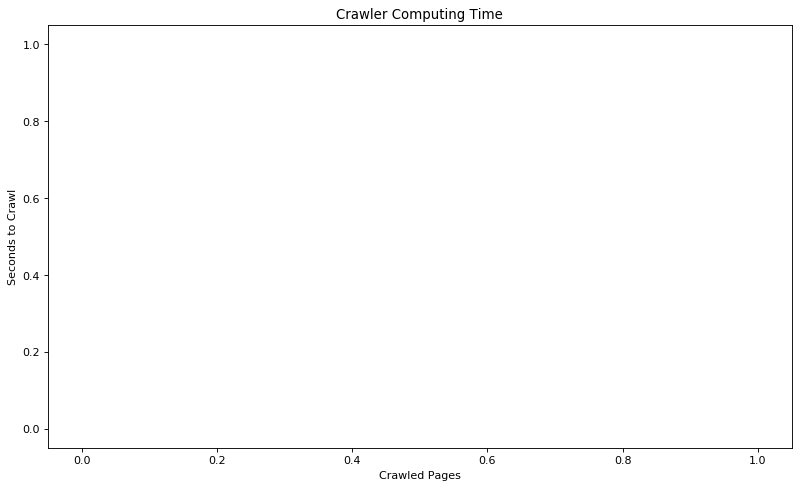

In [9]:
np.set_printoptions(suppress=True)
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(crawl_time)
plt.xlabel("Crawled Pages")
plt.ylabel("Seconds to Crawl")
plt.title("Crawler Computing Time")
import numpy as np
print("Max Computing Time = ", '{:.7f}'.format(np.max(crawl_time)))
print("Min Computing Time = ", '{:.7f}'.format(np.min(crawl_time)))
print("Mean Computing Time = ", '{:.7f}'.format(np.mean(crawl_time)))
print("Median Computing Time = ", '{:.7f}'.format(np.median(crawl_time)))
print("Variation Computing Time = ", '{:.25f}'.format(np.var(crawl_time)))
print("Standard-Deviation Computing Time = ", '{:.7f}'.format(np.std(crawl_time)))